<a href="https://colab.research.google.com/github/FernandoHC546/CITT-Ambassadors-Program-/blob/main/CITT_Ambassadors1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CITT Ambassador Program Data Visualization

The purpose of this code is to replicate the graphic visualizations that shows the data from the AMBASSADORS program. Data was collected from the prevoius PDFs/PowerPoints done on September 13th and adjusted with the latest CSV file.

This notebook has 8 different charts showing metrics from the web-based app. This graphs were done with direct input from the ones previously done (like an artist copying a drawing). Hence, the input variables were directly typed in the code. The purpose of this is so that we can add the new values and delete previous ones without the need to manipulate the excel file directly.

We could also gather the data directly from the excel file if we add/mount google drive in the code and then extract the data from the file, but then future modifications would need to come from the excel directly. For this, I believe this method is more convenient for our needs at the moment.

Images will be saved in a file in google drive, and then added to the graphs (CITT logo). Images, numbers, lines, or any other type of visualization can be added directly in here as well.

In all charts, we can see that the data was input in the [#Data from the chart] line. When adding new values, we just need to type the month and the rest of the following values according to the newest excel file. This will directly reflect a new bar with all the information that we added.

This will save us hours when doing the future charts, because they are already made, and adding new values will just update the graphics spacing and dimensions without the need to it manually.

# CHART 1

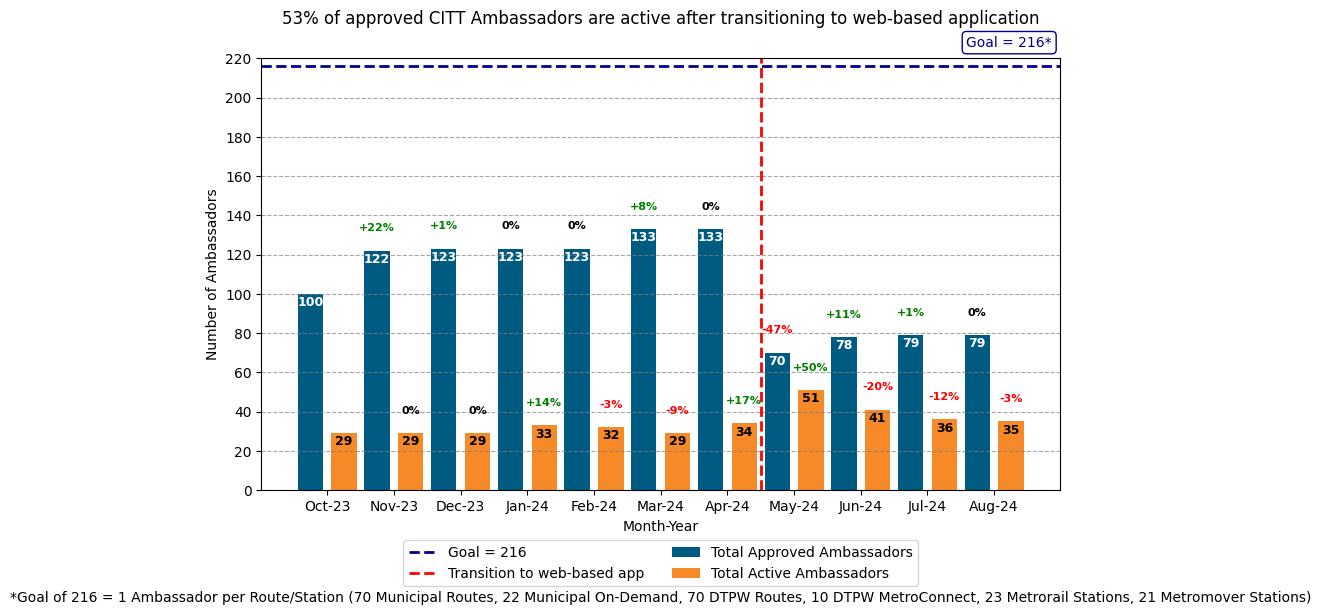

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the chart
months = ['Oct-23', 'Nov-23', 'Dec-23', 'Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24']
total_ambassadors = [100, 122, 123, 123, 123, 133, 133, 70, 78, 79, 79]
active_ambassadors = [29, 29, 29, 33, 32, 29, 34, 51, 41, 36, 35]

# Ensure these lists also have the correct number of entries (same as months, starting from the second month for percentages)
percent_changes_total = ['+22%', '+1%', '0%', '0%', '+8%', '0%', '-47%', '+11%', '+1%', '0%', '0%']  # Add percentages for July and August
percent_changes_active = ['0%', '0%', '+14%', '-3%', '-9%', '+17%', '+50%', '-20%', '-12%', '-3%']  # Add percentages for July and August


# Create bar chart
bar_width = 0.38
x = np.arange(len(months))

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for Total Approved Ambassadors
total_bars = ax.bar(x - bar_width/1.5, total_ambassadors, bar_width, label='Total Approved Ambassadors', color='#005B82')

# Bars for Total Active Ambassadors
active_bars = ax.bar(x + bar_width/1.5, active_ambassadors, bar_width, label='Total Active Ambassadors', color='#F68A29')

# Add percentage and number labels inside bars and percentages above bars
for i in range(len(months)):
    # Add total ambassador numbers inside the blue bars, near the top (with white color)
    ax.text(x[i] - bar_width/1.5, total_ambassadors[i] - 6, f'{total_ambassadors[i]}', ha='center', color='white', fontweight='bold', fontsize=9)

    # Add active ambassador numbers inside the orange bars, near the top (with black color)
    ax.text(x[i] + bar_width/1.5, active_ambassadors[i] - 6, f'{active_ambassadors[i]}', ha='center', color='black', fontweight='bold', fontsize=9)

    # Skip percentage change on the first bar, as there's no previous comparison
    if i > 0:  # Start showing percentage changes from the second bar onward
        # Add total ambassador percentage change with color logic
        if '-' in percent_changes_total[i-1]:  # Negative percentage (red)
            ax.text(x[i] - bar_width/1.5, total_ambassadors[i] + 10, f'{percent_changes_total[i-1]}', ha='center', color='red', fontweight='bold', fontsize=8)
        elif percent_changes_total[i-1] == '0%':  # 0% percentage (black)
            ax.text(x[i] - bar_width/1.5, total_ambassadors[i] + 10, f'{percent_changes_total[i-1]}', ha='center', color='black', fontweight='bold', fontsize=8)
        else:  # Positive percentage (green)
            ax.text(x[i] - bar_width/1.5, total_ambassadors[i] + 10, f'{percent_changes_total[i-1]}', ha='center', color='green', fontweight='bold', fontsize=8)

        # Add active ambassador percentage change with color logic
        if '-' in percent_changes_active[i-1]:  # Negative percentage (red)
            ax.text(x[i] + bar_width/1.5, active_ambassadors[i] + 10, f'{percent_changes_active[i-1]}', ha='center', color='red', fontweight='bold', fontsize=8)
        elif percent_changes_active[i-1] == '0%':  # 0% percentage (black)
            ax.text(x[i] + bar_width/1.5, active_ambassadors[i] + 10, f'{percent_changes_active[i-1]}', ha='center', color='black', fontweight='bold', fontsize=8)
        else:  # Positive percentage (green)
            ax.text(x[i] + bar_width/1.5, active_ambassadors[i] + 10, f'{percent_changes_active[i-1]}', ha='center', color='green', fontweight='bold', fontsize=8)


# Set y-axis increments to 20, with a limit of 220
ax.set_yticks(np.arange(0, 241, 20))
ax.set_ylim(0, 220)

# Add horizontal grid lines
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Add a blue dashed line for the goal at 216
ax.axhline(y=216, color='darkblue', linestyle='--', linewidth=2, label='Goal = 216')

# Add vertical red dashed line to show the transition to the web-based app after April
ax.axvline(x=6.5, color='red', linestyle='--', linewidth=2, label='Transition to web-based app')

# Add some text for the title, axis labels, and legend
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Ambassadors')
ax.set_title('53% of approved CITT Ambassadors are active after transitioning to web-based application', pad=25)
ax.set_xticks(x)
ax.set_xticklabels(months)

# Adjust the goal annotation box outside the chart area
ax.annotate('Goal = 216*', xy=(0.99, 1.02), xycoords='axes fraction', fontsize=10, color='darkblue',
            ha='right', va='bottom', bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'))

# Increase the bottom margin to make space for the custom text and avoid overlap with the legend
fig.subplots_adjust(bottom=0.3, top=0.85)

# Place the legend slightly higher, outside the plot area
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=False, ncol=2)

# Add the custom statement below the graph
ax.text(0.5, -0.25, '*Goal of 216 = 1 Ambassador per Route/Station (70 Municipal Routes, 22 Municipal On-Demand, '
                    '70 DTPW Routes, 10 DTPW MetroConnect, 23 Metrorail Stations, 21 Metromover Stations)',
        ha='center', va='center', fontsize=10, color='black', transform=ax.transAxes)


plt.tight_layout()
plt.show()


# CHART 2

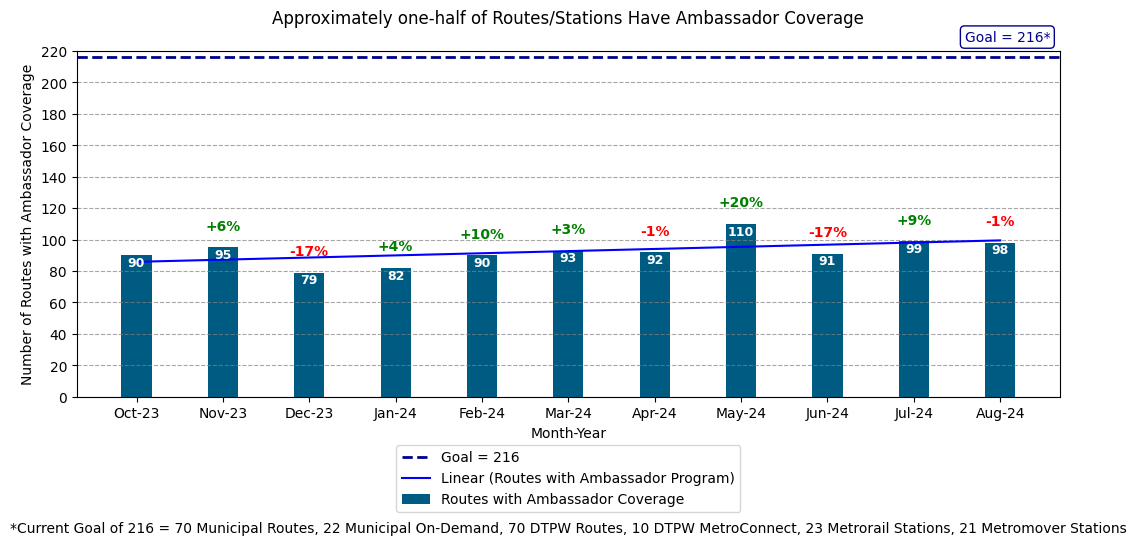

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the chart
months = ['Oct-23', 'Nov-23', 'Dec-23', 'Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24']
routes_with_coverage = [90, 95, 79, 82, 90, 93, 92, 110, 91, 99, 98]
percent_changes = ['+6%', '-17%', '+4%', '+10%', '+3%', '-1%', '+20%', '-17%', '+9%', '-1%', '0%']  # Ensure there are 11 values

# Create bar chart
bar_width = 0.35
x = np.arange(len(months))

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for Routes with Ambassador Coverage
bars = ax.bar(x, routes_with_coverage, bar_width, label='Routes with Ambassador Coverage', color='#005B82')

# Add numbers inside the bars (with white color)
for i in range(len(months)):
    ax.text(x[i], routes_with_coverage[i] - 7, f'{routes_with_coverage[i]}', ha='center', color='white', fontweight='bold', fontsize=9)

# Add percentage labels above bars, starting from the second bar (index 1)
for i in range(1, len(months)):  # Start from index 1 instead of 0
    if '-' in percent_changes[i - 1]:  # Negative percentage (red)
        ax.text(x[i], routes_with_coverage[i] + 11, f'{percent_changes[i - 1]}', ha='center', color='red', fontweight='bold', fontsize=10)
    else:  # Positive percentage (green)
        ax.text(x[i], routes_with_coverage[i] + 11, f'{percent_changes[i - 1]}', ha='center', color='green', fontweight='bold', fontsize=10)

# Set y-axis increments to 20, with a limit of 220
ax.set_yticks(np.arange(0, 241, 20))
ax.set_ylim(0, 220)

# Add horizontal grid lines
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Add a blue dashed line for the goal at 216
ax.axhline(y=216, color='darkblue', linestyle='--', linewidth=2, label='Goal = 216')

# Set axis labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Routes with Ambassador Coverage')
ax.set_title('Approximately one-half of Routes/Stations Have Ambassador Coverage', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(months)

# Adjust the goal annotation box outside the chart area
ax.annotate('Goal = 216*', xy=(0.99, 1.02), xycoords='axes fraction', fontsize=10, color='darkblue',
            ha='right', va='bottom', bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'))

# Add custom statement below the graph, moved lower to avoid overlap with legend
ax.text(0.5, -0.38, '*Current Goal of 216 = 70 Municipal Routes, 22 Municipal On-Demand, 70 DTPW Routes, '
                    '10 DTPW MetroConnect, 23 Metrorail Stations, 21 Metromover Stations',
        ha='center', va='center', fontsize=10, color='black', transform=ax.transAxes)

# Add a linear trend line
z = np.polyfit(x, routes_with_coverage, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='blue', label='Linear (Routes with Ambassador Program)')

# Place the legend below the chart, outside the plot area, and include trend line in legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), fancybox=True, shadow=False, ncol=1)

plt.tight_layout()
plt.show()

# CHART 3

For chart 3. The first one is a copy of the one previously made. The second one is a proposal. It could look better if we show the trend with a line graph that shows the upper trend. The third one is a proposal but without the values and all the details, just a "mock-up" example.

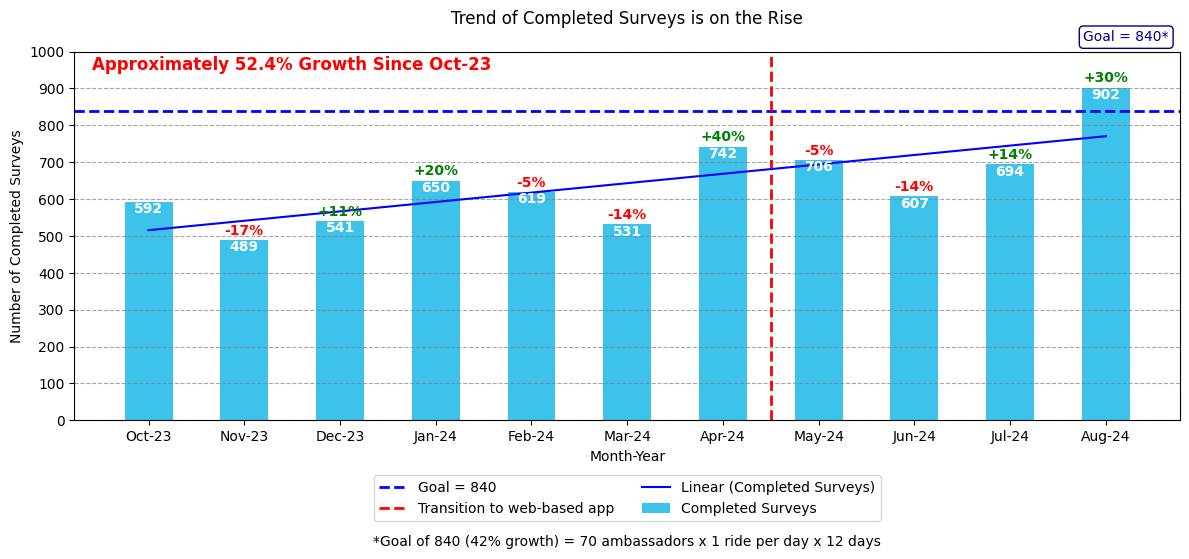

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
months = ['Oct-23', 'Nov-23', 'Dec-23', 'Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24']
completed_surveys = [592, 489, 541, 650, 619, 531, 742, 706, 607, 694, 902]
percent_changes = ['-17%', '+11%', '+20%', '-5%', '-14%', '+40%', '-5%', '-14%', '+14%', '+30%']

# Create bar chart
bar_width = 0.50
x = np.arange(len(months))

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for Completed Surveys
bars = ax.bar(x, completed_surveys, bar_width, label='Completed Surveys', color='#3dc2eb')

# Add numbers inside the bars (with white color)
for i in range(len(months)):
    ax.text(x[i], completed_surveys[i] - 30, f'{completed_surveys[i]}', ha='center', color='white', fontweight='bold', fontsize=10)

# Add percentage labels above bars
for i in range(1, len(months)):  # Skipping the first bar for percentage change
    if '-' in percent_changes[i-1]:  # Negative percentage (red)
        ax.text(x[i], completed_surveys[i] + 15, f'{percent_changes[i-1]}', ha='center', color='red', fontweight='bold', fontsize=10)
    else:  # Positive percentage (green)
        ax.text(x[i], completed_surveys[i] + 15, f'{percent_changes[i-1]}', ha='center', color='green', fontweight='bold', fontsize=10)

# Set y-axis increments to 100, with a limit of 1000
ax.set_yticks(np.arange(0, 1001, 100))
ax.set_ylim(0, 1000)

# Add horizontal grid lines
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Add a blue dashed line for the goal at 840
ax.axhline(y=840, color='blue', linestyle='--', linewidth=2, label='Goal = 840')

# Add a red vertical dashed line after April to indicate transition
ax.axvline(x=6.5, color='red', linestyle='--', linewidth=2, label='Transition to web-based app')

# Add a linear trend line
z = np.polyfit(x, completed_surveys, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='blue', label='Linear (Completed Surveys)')

# Set axis labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Completed Surveys')
ax.set_title('Trend of Completed Surveys is on the Rise', pad=20)

# Set the x-ticks and ensure the labels are displayed
ax.set_xticks(x)
ax.set_xticklabels(months)

ax.annotate('Goal = 840*', xy=(0.99, 1.02), xycoords='axes fraction', fontsize=10, color='darkblue',
            ha='right', va='bottom', bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'))

# Add custom statement above the chart for growth percentage
ax.text(1.50, 950, 'Approximately 52.4% Growth Since Oct-23', ha='center', color='red', fontweight='bold', fontsize=12)

# Add custom statement below the chart for the goal explanation
ax.text(0.5, -0.33, '*Goal of 840 (42% growth) = 70 ambassadors x 1 ride per day x 12 days',
        ha='center', va='center', fontsize=10, color='black', transform=ax.transAxes)

# Place the legend slightly higher, outside the plot area
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13), fancybox=True, shadow=False, ncol=2)

plt.tight_layout()
plt.show()


⚛ Proposal 1 ⏬

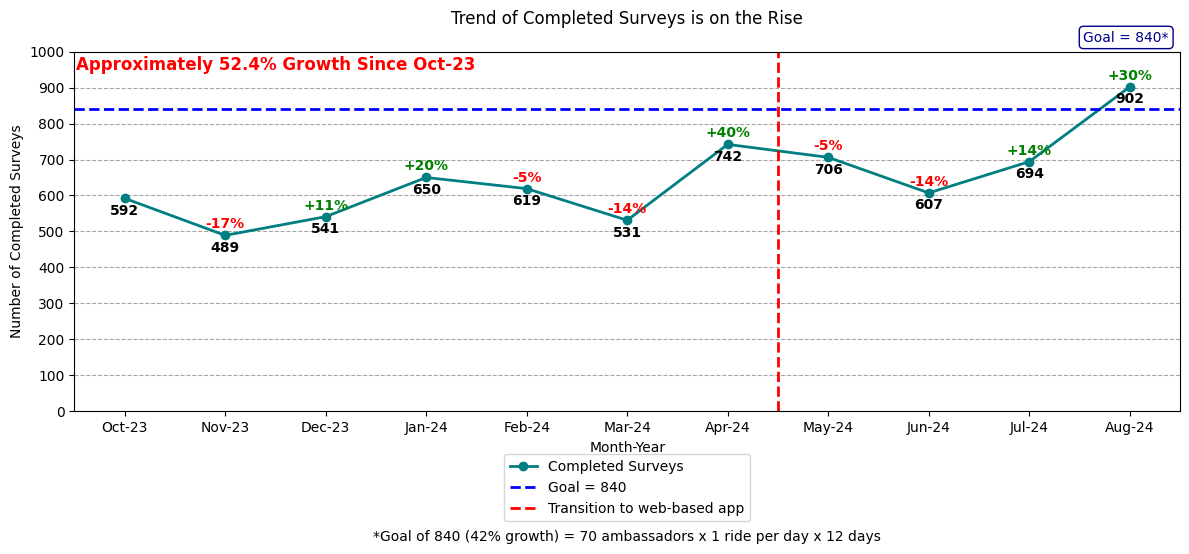

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
months = ['Oct-23', 'Nov-23', 'Dec-23', 'Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24']
completed_surveys = [592, 489, 541, 650, 619, 531, 742, 706, 607, 694, 902]
percent_changes = ['-17%', '+11%', '+20%', '-5%', '-14%', '+40%', '-5%', '-14%', '+14%', '+30%']

# Create a line chart
x = np.arange(len(months))

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the line for completed surveys
ax.plot(x, completed_surveys, marker='o', color='#007e82', label='Completed Surveys', linewidth=2)

# Add numbers next to the points on the line
for i in range(len(months)):
    ax.text(x[i], completed_surveys[i] - 45, f'{completed_surveys[i]}', ha='center', color='black', fontweight='bold', fontsize=10)

# Add percentage labels above the line
for i in range(1, len(months)):  # Skipping the first point for percentage change
    if '-' in percent_changes[i-1]:  # Negative percentage (red)
        ax.text(x[i], completed_surveys[i] + 20, f'{percent_changes[i-1]}', ha='center', color='red', fontweight='bold', fontsize=10)
    else:  # Positive percentage (green)
        ax.text(x[i], completed_surveys[i] + 20, f'{percent_changes[i-1]}', ha='center', color='green', fontweight='bold', fontsize=10)

# Set y-axis increments to 100, with a limit of 1000
ax.set_yticks(np.arange(0, 1001, 100))
ax.set_ylim(0, 1000)

# Add horizontal grid lines
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Add a blue dashed line for the goal at 840
ax.axhline(y=840, color='blue', linestyle='--', linewidth=2, label='Goal = 840')

# Add a red vertical dashed line after April to indicate transition
ax.axvline(x=6.5, color='red', linestyle='--', linewidth=2, label='Transition to web-based app')

# Set axis labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Completed Surveys')
ax.set_title('Trend of Completed Surveys is on the Rise', pad=20)

# Set the x-ticks and ensure the labels are displayed straight (no rotation)
ax.set_xticks(x)
ax.set_xticklabels(months)

ax.annotate('Goal = 840*', xy=(0.99, 1.02), xycoords='axes fraction', fontsize=10, color='darkblue',
            ha='right', va='bottom', bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'))

# Add custom statement above the chart for growth percentage
ax.text(1.50, 950, 'Approximately 52.4% Growth Since Oct-23', ha='center', color='red', fontweight='bold', fontsize=12)

# Add custom statement below the chart for the goal explanation
ax.text(0.5, -0.35, '*Goal of 840 (42% growth) = 70 ambassadors x 1 ride per day x 12 days',
        ha='center', va='center', fontsize=10, color='black', transform=ax.transAxes)

# Place the legend below the chart, outside the plot area, and include trend line in legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=False, ncol=1)

plt.tight_layout()
plt.show()


⚖ Proposal 2 ⏬

Mock-up. Real Values and details need to be added.

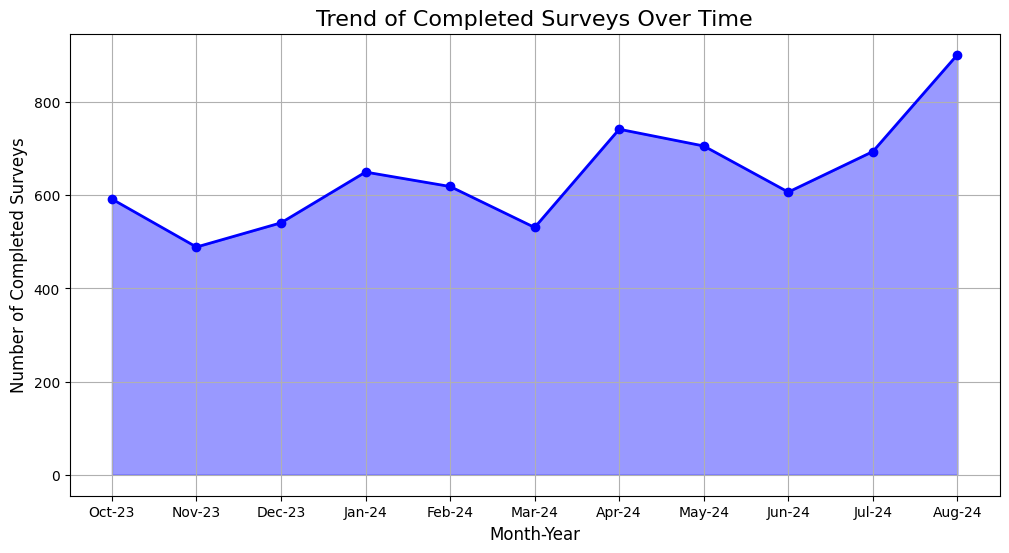

In [ ]:
import matplotlib.pyplot as plt

# Data for completed surveys
months = ['Oct-23', 'Nov-23', 'Dec-23', 'Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24']
completed_surveys = [592, 489, 541, 650, 619, 531, 742, 706, 607, 694, 902]

# Create an area chart
plt.figure(figsize=(12, 6))
plt.fill_between(months, completed_surveys, color='blue', alpha=0.4)  # Fill the area under the line
plt.plot(months, completed_surveys, marker='o', color='blue', linewidth=2)  # Plot the line on top of the filled area

# Add labels and title
plt.title('Trend of Completed Surveys Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Completed Surveys', fontsize=12)

# Add a grid for better readability
plt.grid(True)

# Show the chart
plt.show()



# CHART 4

For this, I created the table first. With each new month, we can just add the new values. Then I can edit them together in a document to show the table and the graph together.

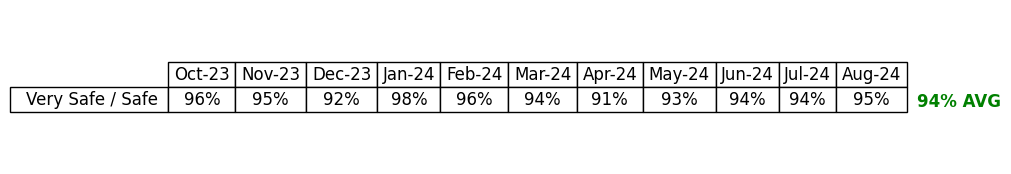

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the table
months = ['Oct-23', 'Nov-23', 'Dec-23', 'Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24']
combined_safe = ['96%', '95%', '92%', '98%', '96%', '94%', '91%', '93%', '94%', '94%', '95%']

# Create a figure
fig, ax = plt.subplots(figsize=(8, 2))  # Adjust figure size as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create table
the_table = ax.table(cellText=[combined_safe],
                     rowLabels=['Very Safe / Safe'],
                     colLabels=months,
                     cellLoc='center',
                     loc='center')

# Format the table
the_table.scale(1, 1.5)  # Adjust scaling
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.auto_set_column_width(col=list(range(len(months))))

#"94% AVG" text in green next to the table
ax.text(1.18, 0.4, '94% AVG', ha='center', va='center', color='green', fontweight='bold', fontsize=12, transform=ax.transAxes)

# Display the table
plt.show()


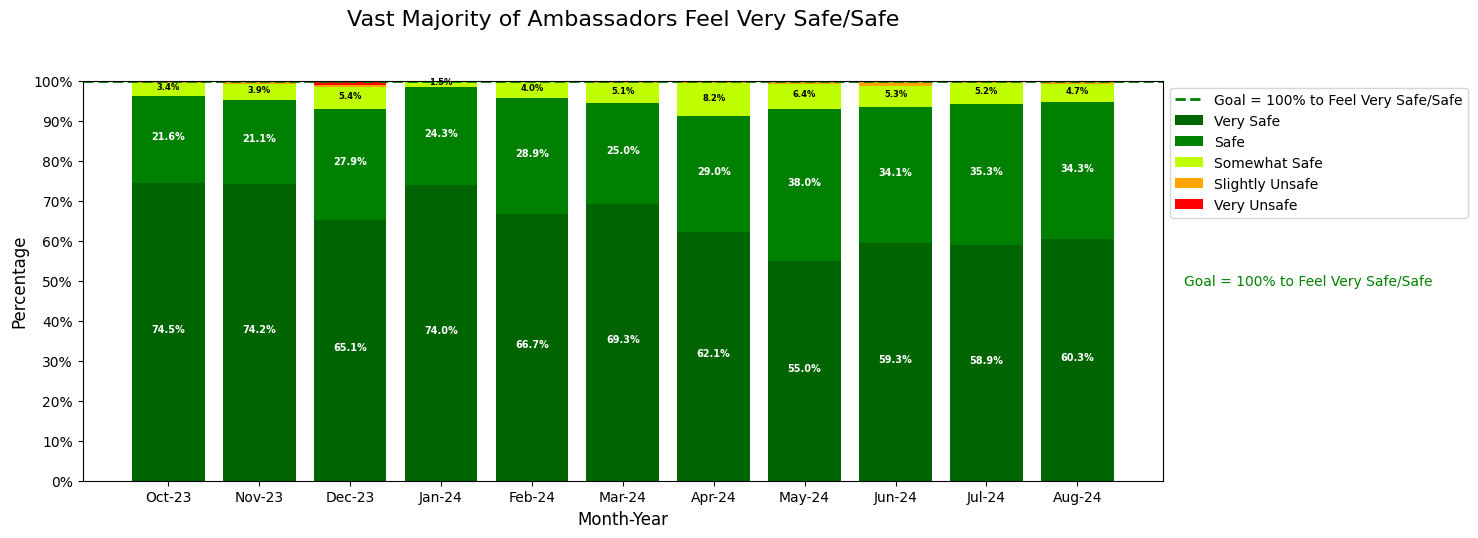

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Data for the chart
months = ['Oct-23', 'Nov-23', 'Dec-23', 'Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24']
very_unsafe = [2, 1, 6, 1, 1, 1, 0, 1, 1, 2, 2]  # Very Unsafe (Red)
slightly_unsafe = [1, 3, 3, 0, 1, 2, 5, 4, 7, 2, 5]  # Slightly Unsafe (Orange)
somewhat_safe = [20, 19, 29, 10, 25, 27, 61, 45, 32, 36, 42]  # Somewhat Safe (Yellowish Green)
safe = [128, 103, 151, 158, 179, 133, 215, 268, 207, 245, 309]  # Safe (Green)
very_safe = [441, 363, 352, 481, 413, 368, 461, 388, 360, 409, 544]  # Very Safe (Dark Green)

# Total responses for each month
totals = [sum(x) for x in zip(very_unsafe, slightly_unsafe, somewhat_safe, safe, very_safe)]

# Calculate percentages
very_unsafe_perc = [v / t * 100 for v, t in zip(very_unsafe, totals)]
slightly_unsafe_perc = [v / t * 100 for v, t in zip(slightly_unsafe, totals)]
somewhat_safe_perc = [v / t * 100 for v, t in zip(somewhat_safe, totals)]
safe_perc = [v / t * 100 for v, t in zip(safe, totals)]
very_safe_perc = [v / t * 100 for v, t in zip(very_safe, totals)]

# Create a larger figure to accommodate the chart
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted to a larger size

# Stacking the bars with percentages but reversed order (start from "Very Safe")
ax.bar(np.arange(len(months)), very_safe_perc, label='Very Safe', color='#006400')  # Dark green
ax.bar(np.arange(len(months)), safe_perc, bottom=np.array(very_safe_perc), label='Safe', color='green')
ax.bar(np.arange(len(months)), somewhat_safe_perc, bottom=np.array(very_safe_perc) + np.array(safe_perc), label='Somewhat Safe', color='#BFFF00')  # Yellowish green
ax.bar(np.arange(len(months)), slightly_unsafe_perc, bottom=np.array(very_safe_perc) + np.array(safe_perc) + np.array(somewhat_safe_perc), label='Slightly Unsafe', color='orange')
ax.bar(np.arange(len(months)), very_unsafe_perc, bottom=np.array(very_safe_perc) + np.array(safe_perc) + np.array(somewhat_safe_perc) + np.array(slightly_unsafe_perc), label='Very Unsafe', color='red')

# Add the percentage values inside the bars for "Somewhat Safe," "Safe," and "Very Safe" in white
for i in range(len(months)):
    # Only show percentages for the larger categories: "Somewhat Safe," "Safe," and "Very Safe"
    ax.text(i, very_safe_perc[i] / 2, f'{very_safe_perc[i]:.1f}%', ha='center', color='white', fontsize=7, fontweight='bold')
    ax.text(i, very_safe_perc[i] + safe_perc[i] / 2, f'{safe_perc[i]:.1f}%', ha='center', color='white', fontsize=7, fontweight='bold')
    ax.text(i, very_safe_perc[i] + safe_perc[i] + somewhat_safe_perc[i] / 2, f'{somewhat_safe_perc[i]:.1f}%', ha='center', color='black', fontsize=6, fontweight='bold')

# Set labels and title
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Vast Majority of Ambassadors Feel Very Safe/Safe', fontsize=16, pad=40)

# Set x-ticks and x-tick labels
ax.set_xticks(np.arange(len(months)))
ax.set_xticklabels(months, fontsize=10)

# Set y-axis to display percentages
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylim(0, 100)

# Function to format y-axis labels as percentages
def to_percent(y, _):
    return f'{int(y)}%'  # Format the y-value as a percentage

# Set the y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(to_percent))

# Add a dashed line for the goal (100%)
ax.axhline(y=100, color='green', linestyle='--', linewidth=2, label='Goal = 100% to Feel Very Safe/Safe')

# Add a legend outside the chart
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add a custom statement below the legend
ax.text(1.02, 0.5, 'Goal = 100% to Feel Very Safe/Safe', ha='left', va='center', color='green', fontsize=10, transform=ax.transAxes)

# Adjust the margins to make more space for the chart
plt.subplots_adjust(top=0.60, bottom=0.1, left=0.1, right=1.0)

# Show the chart
plt.show()

Tried to them put them together in here, but looks  messy. Still figuring out the exact distances to attach them together in here.

Maybe, a Pie Chart could be better to showcase this values. A pie chart for each month shown all together, one next to the other one.

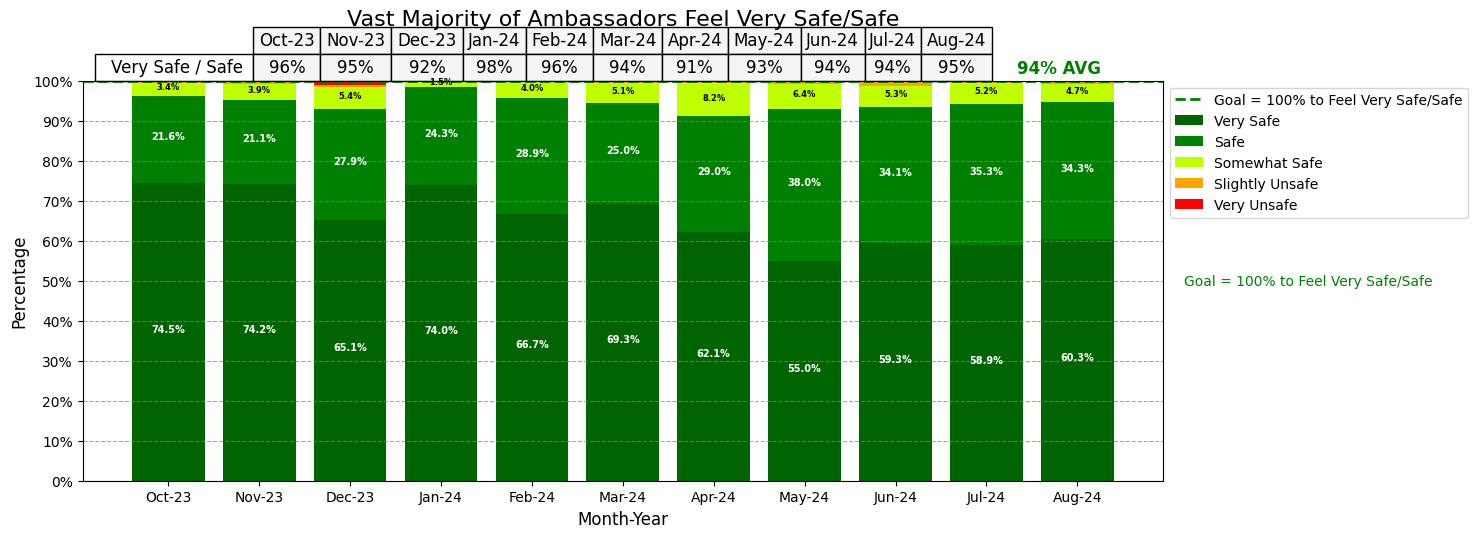

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Data for the chart
months = ['Oct-23', 'Nov-23', 'Dec-23', 'Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24']
very_unsafe = [2, 1, 6, 1, 1, 1, 0, 1, 1, 2, 2]  # Very Unsafe (Red)
slightly_unsafe = [1, 3, 3, 0, 1, 2, 5, 4, 7, 2, 5]  # Slightly Unsafe (Orange)
somewhat_safe = [20, 19, 29, 10, 25, 27, 61, 45, 32, 36, 42]  # Somewhat Safe (Yellowish Green)
safe = [128, 103, 151, 158, 179, 133, 215, 268, 207, 245, 309]  # Safe (Green)
very_safe = [441, 363, 352, 481, 413, 368, 461, 388, 360, 409, 544]  # Very Safe (Dark Green)

# Total responses for each month
totals = [sum(x) for x in zip(very_unsafe, slightly_unsafe, somewhat_safe, safe, very_safe)]

# Calculate percentages
very_unsafe_perc = [v / t * 100 for v, t in zip(very_unsafe, totals)]
slightly_unsafe_perc = [v / t * 100 for v, t in zip(slightly_unsafe, totals)]
somewhat_safe_perc = [v / t * 100 for v, t in zip(somewhat_safe, totals)]
safe_perc = [v / t * 100 for v, t in zip(safe, totals)]
very_safe_perc = [v / t * 100 for v, t in zip(very_safe, totals)]

# Create a larger figure to accommodate the table and chart
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted to a larger size

# Stacking the bars with percentages but reversed order (start from "Very Safe")
ax.bar(np.arange(len(months)), very_safe_perc, label='Very Safe', color='#006400')  # Dark green
ax.bar(np.arange(len(months)), safe_perc, bottom=np.array(very_safe_perc), label='Safe', color='green')
ax.bar(np.arange(len(months)), somewhat_safe_perc, bottom=np.array(very_safe_perc) + np.array(safe_perc), label='Somewhat Safe', color='#BFFF00')  # Yellowish green
ax.bar(np.arange(len(months)), slightly_unsafe_perc, bottom=np.array(very_safe_perc) + np.array(safe_perc) + np.array(somewhat_safe_perc), label='Slightly Unsafe', color='orange')
ax.bar(np.arange(len(months)), very_unsafe_perc, bottom=np.array(very_safe_perc) + np.array(safe_perc) + np.array(somewhat_safe_perc) + np.array(slightly_unsafe_perc), label='Very Unsafe', color='red')

# Add the percentage values inside the bars for "Somewhat Safe," "Safe," and "Very Safe" in white
for i in range(len(months)):
    # Only show percentages for the larger categories: "Somewhat Safe," "Safe," and "Very Safe"
    ax.text(i, very_safe_perc[i] / 2, f'{very_safe_perc[i]:.1f}%', ha='center', color='white', fontsize=7, fontweight='bold')
    ax.text(i, very_safe_perc[i] + safe_perc[i] / 2, f'{safe_perc[i]:.1f}%', ha='center', color='white', fontsize=7, fontweight='bold')
    ax.text(i, very_safe_perc[i] + safe_perc[i] + somewhat_safe_perc[i] / 2, f'{somewhat_safe_perc[i]:.1f}%', ha='center', color='black', fontsize=6, fontweight='bold')

# Set labels and title
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Vast Majority of Ambassadors Feel Very Safe/Safe', fontsize=16, pad=40)  # Increased pad for title

# Set x-ticks and x-tick labels
ax.set_xticks(np.arange(len(months)))
ax.set_xticklabels(months, fontsize=10)

# Set y-axis to display percentages
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylim(0, 100)

# Function to format y-axis labels as percentages
def to_percent(y, _):
    return f'{int(y)}%'  # Format the y-value as a percentage

# Set the y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(to_percent))

# Add a dashed line for the goal (100%)
ax.axhline(y=100, color='green', linestyle='--', linewidth=2, label='Goal = 100% to Feel Very Safe/Safe')

# Add horizontal grid lines
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Add the table at the top showing "Very Safe / Safe" percentages
combined_safe = ['96%', '95%', '92%', '98%', '96%', '94%', '91%', '93%', '94%', '94%', '95%']
the_table = ax.table(cellText=[combined_safe],
                     rowLabels=['Very Safe / Safe'],
                     colLabels=months,
                     loc='top',
                     cellLoc='center',
                     colColours=['#f5f5f5'] * len(months),
                     cellColours=[['#f5f5f5'] * len(months)])

# Format the table to remove the box and align properly
the_table.scale(1, 2.5)  # Increased the scaling slightly to lift the table
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.auto_set_column_width(col=list(range(len(months))))

# Add average percentage text on the right
ax.text(9.8, 102, '94% AVG', ha='center', color='green', fontweight='bold', fontsize=12)

# Add a legend outside the chart
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add a custom statement below the legend
ax.text(1.02, 0.5, 'Goal = 100% to Feel Very Safe/Safe', ha='left', va='center', color='green', fontsize=10, transform=ax.transAxes)

# Adjust the margins to make more space for the table and chart
plt.subplots_adjust(top=0.60, bottom=0.1, left=0.1, right=1.0)  # Adjusted top margin

# Show the chart
plt.show()


# CHART 5

*numbers need to be corrected, but visualziation is ready

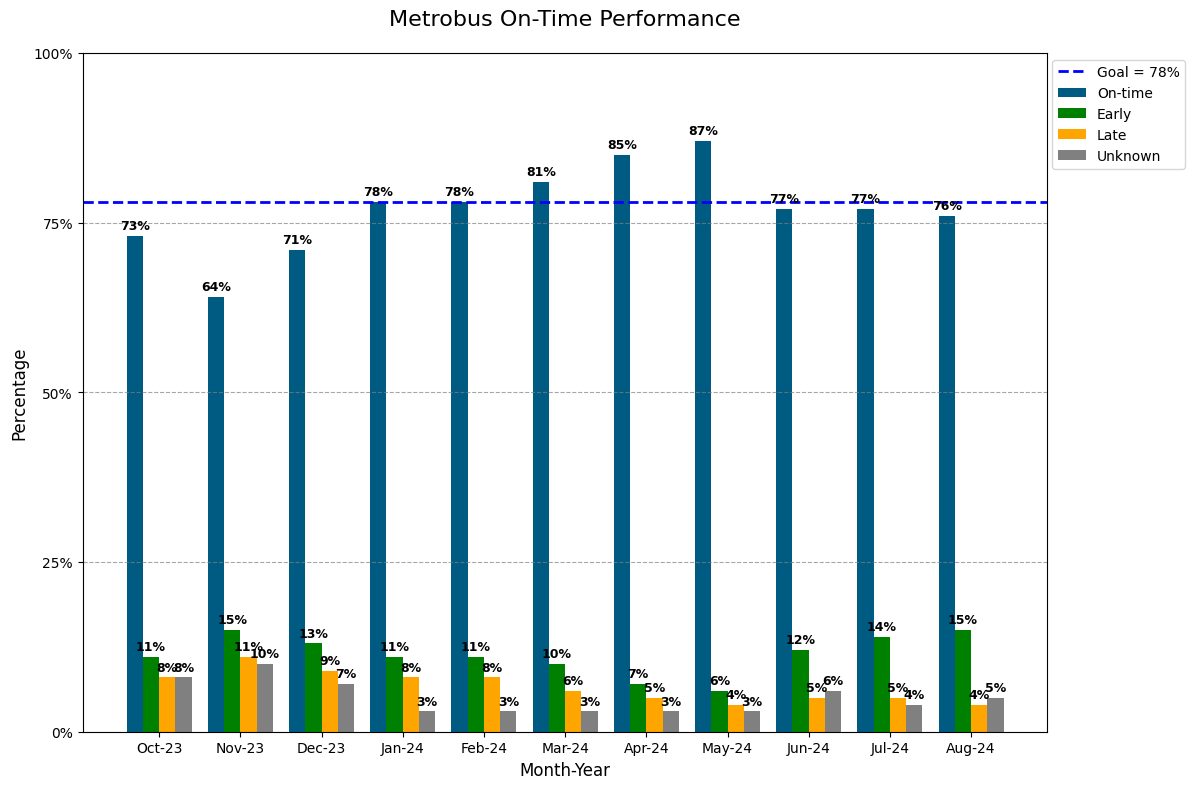

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
months = ['Oct-23', 'Nov-23', 'Dec-23', 'Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24']

# Ensure all lists have 11 entries (same length as 'months')
on_time = [73, 64, 71, 78, 78, 81, 85, 87, 77, 77, 76]  # On-time percentages
early = [11, 15, 13, 11, 11, 10, 7, 6, 12, 14, 15]      # Early percentages
late = [8, 11, 9, 8, 8, 6, 5, 4, 5, 5, 4]              # Late percentages
unknown = [8, 10, 7, 3, 3, 3, 3, 3, 6, 4, 5]           # Unknown percentages

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width and positions
bar_width = 0.2
x = np.arange(len(months))

# Plot the bars next to each other for each month
ax.bar(x - bar_width*1.5, on_time, width=bar_width, label='On-time', color='#005b82')
ax.bar(x - bar_width/2, early, width=bar_width, label='Early', color='green')
ax.bar(x + bar_width/2, late, width=bar_width, label='Late', color='orange')
ax.bar(x + bar_width*1.5, unknown, width=bar_width, label='Unknown', color='gray')

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(months)

# Add percentages above the bars
for i in range(len(months)):
    ax.text(x[i] - bar_width*1.5, on_time[i] + 1, f'{on_time[i]}%', ha='center', color='black', fontweight='bold', fontsize=9)
    ax.text(x[i] - bar_width/2, early[i] + 1, f'{early[i]}%', ha='center', color='black', fontweight='bold', fontsize=9)
    ax.text(x[i] + bar_width/2, late[i] + 1, f'{late[i]}%', ha='center', color='black', fontweight='bold', fontsize=9)
    ax.text(x[i] + bar_width*1.5, unknown[i] + 1, f'{unknown[i]}%', ha='center', color='black', fontweight='bold', fontsize=9)

# Add a dashed line for the goal
ax.axhline(y=78, color='blue', linestyle='--', linewidth=2, label='Goal = 78%')

# Set y-axis to display 0%, 25%, 50%, 75%, and 100%
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_ylim(0, 100)

# Function to format y-axis labels as percentages
def to_percent(y, _):
    return f'{int(y)}%'  # Format the y-value as a percentage

# Set the y-axis formatter to show percentage signs
ax.yaxis.set_major_formatter(plt.FuncFormatter(to_percent))

# Set labels and title
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Metrobus On-Time Performance', fontsize=16, pad=20)

# Add horizontal grid lines
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Adjust layout for clarity
plt.tight_layout()

# Show the chart
plt.show()